# Learning Outcomes
Develop a custom CNN with Keras Tensorflow

## Platform for DL
1. Tensorflow
2. PyTorch
3. Jax'
4. MXNet

## Tensorflow
Tensorflow is a Python-based open source Ml platform from Google. Like NumPy, it enables user to manipulate math expression.

Differences if compared with NumPy:
- Make use of GPU (parallel computing)
- Gradient computation is very easy to implement in Tensorflow.

## Keras
High-level API buuilt on top of Tensorflow.

### The ways to build neural networks with Keras:
1. Sequential Network: Python list stacked with `keras.layers`.
2. Functional API: graph-like data structure. Offers balance between simplicity and flexibilty
3. Model subclassing

## Sequential model

In [1]:
# set up
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# Densely connected layers
model = keras.Sequential([
    layers.Dense(2, activation="relu"),
    layers.Dense(1)
])

model.build(input_shape=(None, 3))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

## Debugging with `add` and `summary`

In [5]:
model = keras.Sequential(name="first_nn_model")
model.add(keras.Input(shape=(3, )))
model.add(layers.Dense(2, activation="relu", name="hidden_layer"))
model.add(layers.Dense(1, name="output_layer"))
model.summary()

Model: "first_nn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)                 │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
import numpy as np
from keras import ops

In [7]:
input_data = np.ones((2, 3))
model(input_data)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.47283062],
       [0.47283062]], dtype=float32)>

In [9]:
input_data.dtype

dtype('float64')

In [11]:
input_data = ops.ones((2, 3))
input_data.dtype

tf.float32

In [12]:
model(input_data)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.47283062],
       [0.47283062]], dtype=float32)>

## Functional API

In [13]:
inputs = keras.Input(shape=(784, ))
inputs.shape

(None, 784)

`None`: denotes batch size

In [14]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [15]:
x = layers.Dense(10, activation="softmax")(x)
x

<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_9>

In [16]:
inputs = keras.Input(shape=(784, ))
x = layers.Dense(64, activation="relu")(inputs)
output = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs, output)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

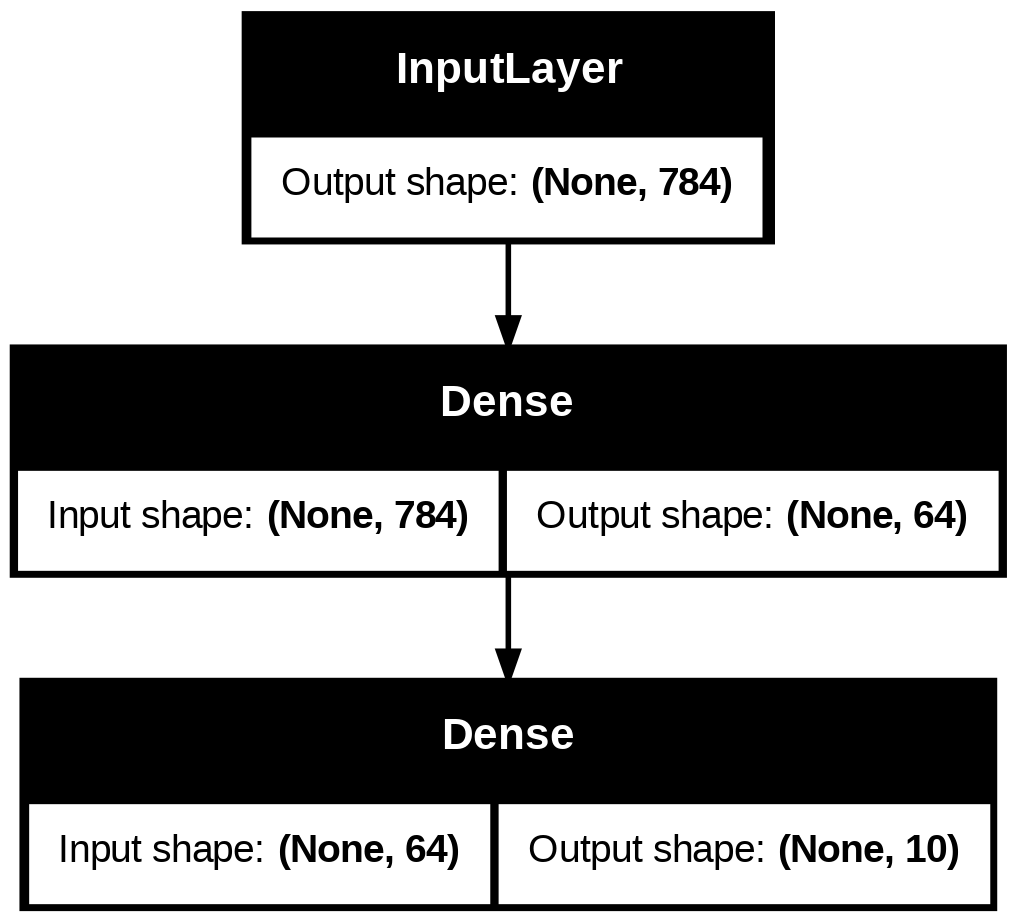

In [17]:
keras.utils.plot_model(model, "first_nn.png", show_shapes=True)

# End-to-end example of image classification using convnet

In [6]:
# set up
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import fashion_mnist

## Step 1: Data Loading

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("The shape of training data: ", X_train.shape)
print("The shape of training labels: ", y_train.shape)
print("The shape of testing data: ", X_test.shape)
print("The shape of testing labels: ", y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
The shape of training data:  (60000, 28, 28)
The shape of training labels:  (60000,)
The shape of testing data:  (10000, 28, 28)
The shape of testing labels:  (10000,)


## Step 2: Data Preprocessing

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [7]:
# Cast the data to float32 and rescale
X_train = X_train.astype("float32") / 255   # [0, 1]
X_test = X_test.astype("float32") / 255

# add a channel dimension
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print("The shape of training data: ", X_train.shape)
print("The shape of test data: ", X_test.shape)

The shape of training data:  (60000, 28, 28, 1)
The shape of test data:  (10000, 28, 28, 1)


## Step 3: Design model architecture (custom CNN)

In [9]:
num_classes = 10
input_shape = X_train.shape[1:]
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", name="conv_layer1"),
    layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", name="conv_layer2"),
    layers.MaxPooling2D(name="max-pooling1"),
    layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", name="conv_layer3"),
    layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", name="conv_layer4"),
    layers.MaxPooling2D(name="max-pooling2"),
    layers.Flatten(name="flatten"),
    layers.Dropout(0.5, name="dropout"),
    layers.Dense(num_classes, name="output")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_layer1 (Conv2D)                 │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer2 (Conv2D)                 │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max-pooling1 (MaxPooling2D)          │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer3 (Conv2D)                 │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer4 (Conv2D)                 │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max-pooling2 (MaxPooling2D)          │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 428,810 (1.64 MB)

 Trainable params: 428,810 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

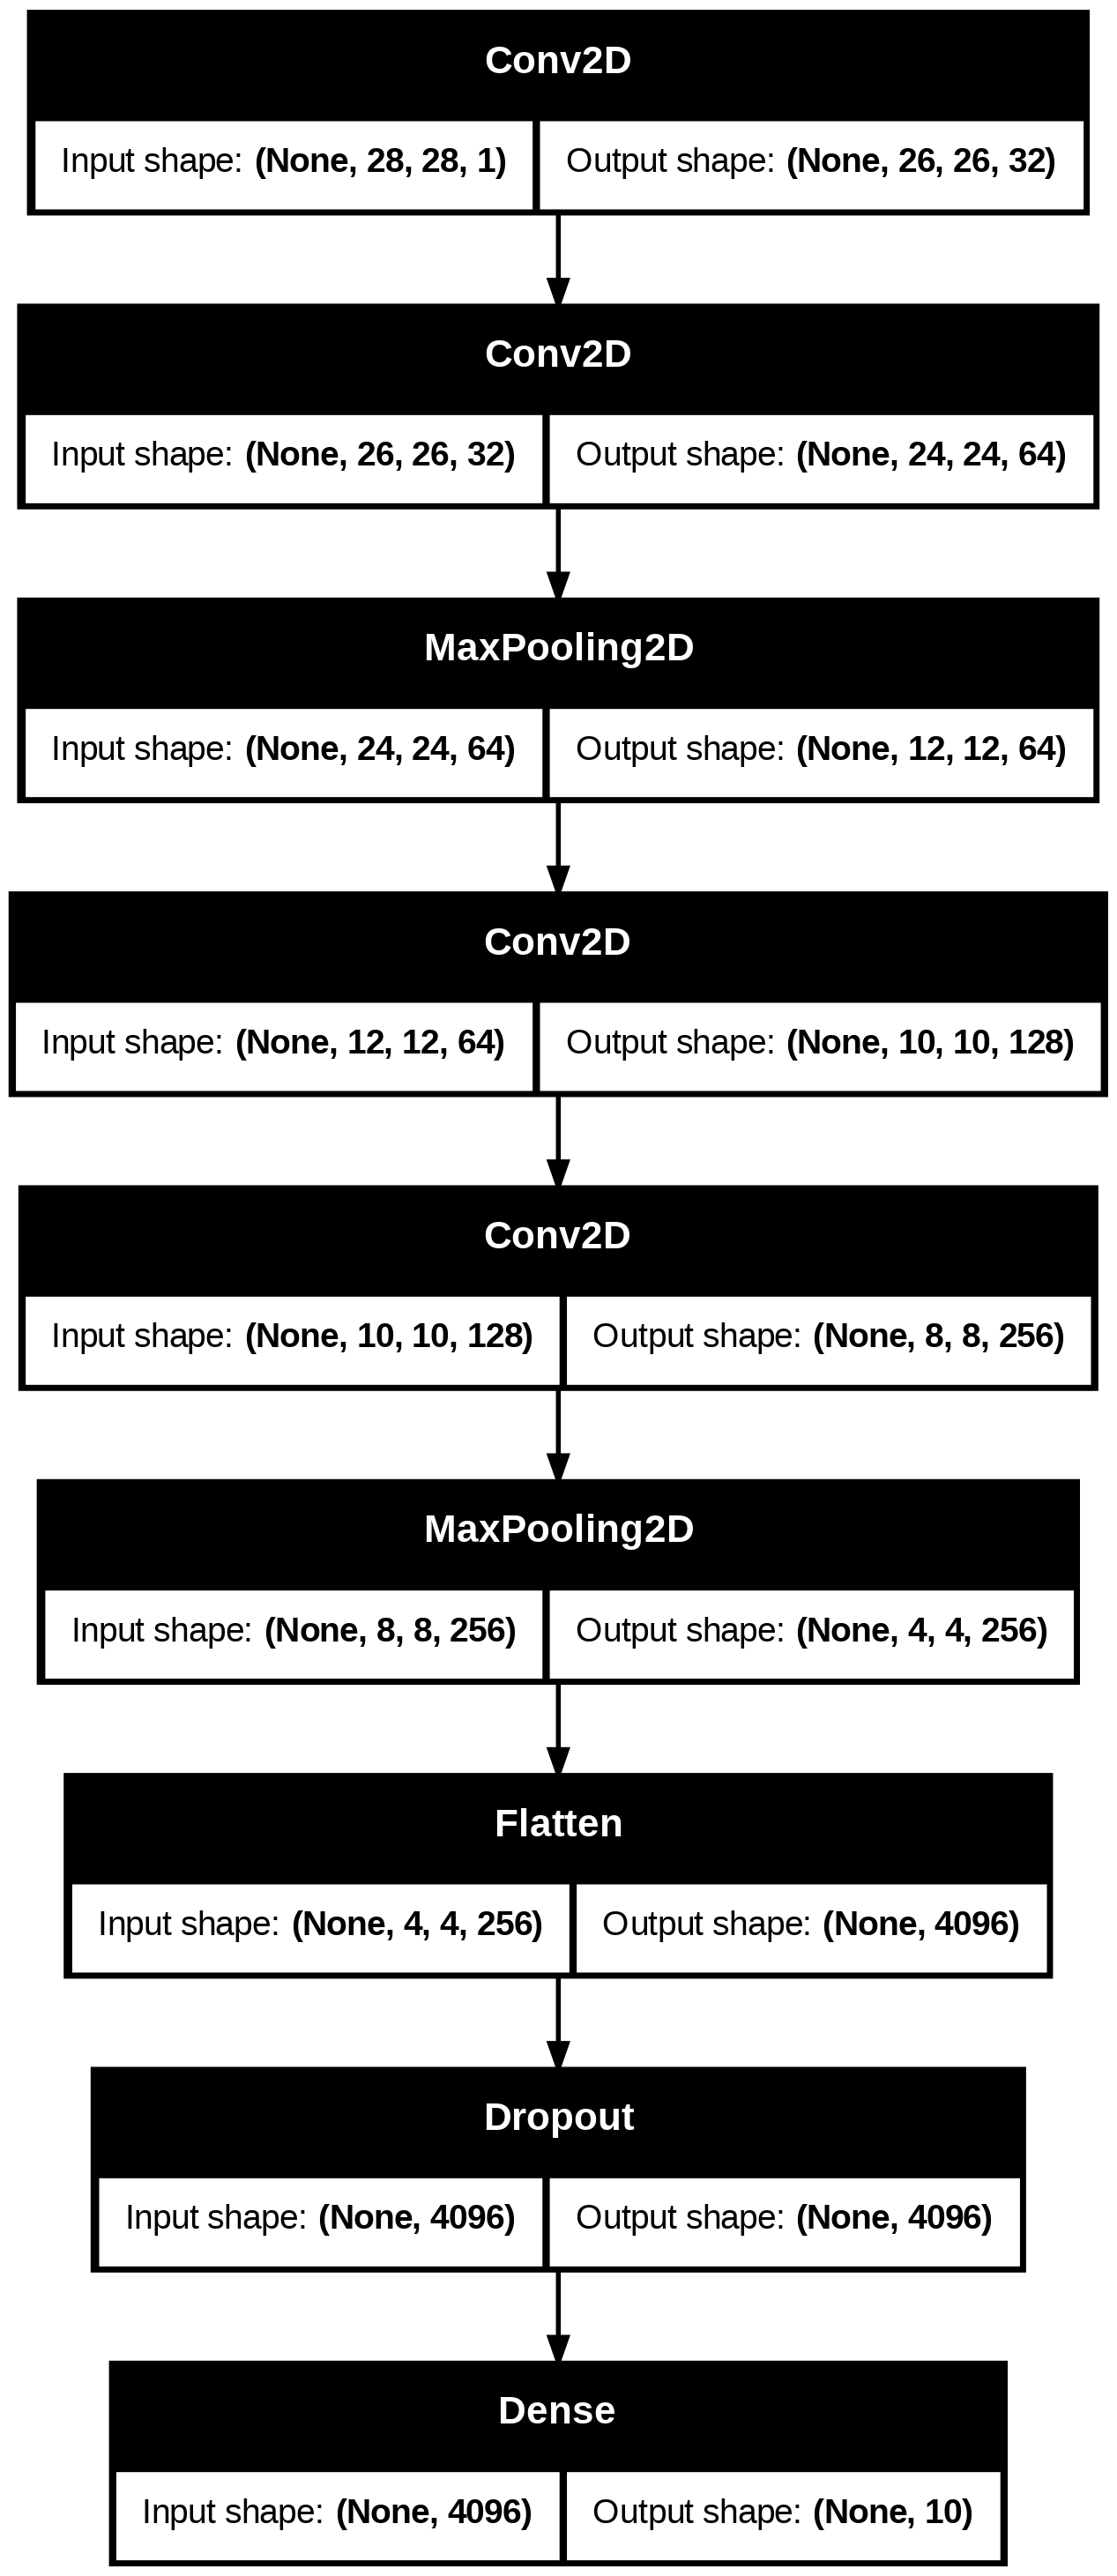

In [10]:
keras.utils.plot_model(model, "convNet_nn.png", show_shapes=True)

In [11]:
# compile the model
model.compile(
    optimizer = keras.optimizers.RMSprop(),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

## Train the model

In [15]:
# callbacks
import os
os.makedirs("tmp", exist_ok=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("tmp/first_convnet.keras", save_best_only=True, mode="min")
]

epochs = 15
batch_size = 64

history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks,
    validation_split=0.15

)

Epoch 1/15
797/797 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - acc: 0.5848 - loss: 1.1256 - val_acc: 0.8147 - val_loss: 0.5027
Epoch 2/15
797/797 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - acc: 0.8194 - loss: 0.4926 - val_acc: 0.8486 - val_loss: 0.4131
Epoch 3/15
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.8529 - loss: 0.4136 - val_acc: 0.8647 - val_loss: 0.3700
Epoch 4/15
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.8674 - loss: 0.3720 - val_acc: 0.8747 - val_loss: 0.3458
Epoch 5/15
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.8792 - loss: 0.3371 - val_acc: 0.8736 - val_loss: 0.3439
Epoch 6/15
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.8835 - loss: 0.3193 - val_acc: 0.8926 - val_loss: 0.2963
Epoch 7/15
797/797 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - acc: 0.8875 - loss: 0.3027 - val_acc: 0.8929 - val_loss: 0.2944
Epoch 8/15
797/797 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.8963 - loss: 0.2863 - val_acc: 0.8961 - val_loss: 0.2876
Epoch 9/15
797/797 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step 

## 5. Model evaluation

In [12]:
import matplotlib.pyplot as plt

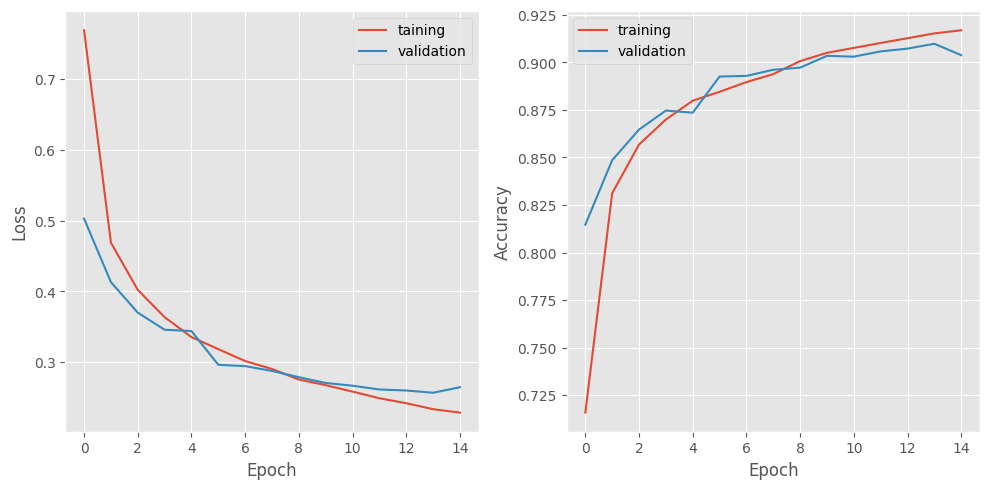

In [16]:
def plot_learning_curve(hist):
  plt.style.use("ggplot")
  plt.figure(figsize=(10, 5))
  plt.subplot(121)
  plt.plot(hist.history["loss"], label="taining")
  plt.plot(hist.history["val_loss"], label="validation")
  plt.legend()
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.subplot(122)
  plt.plot(hist.history["acc"], label="training")
  plt.plot(hist.history["val_acc"], label="validation")
  plt.legend()
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.show()

plot_learning_curve(history)

## Test Accuracy

In [17]:
final_model = keras.models.load_model("tmp/first_convnet.keras")

In [18]:
_, test_acc = final_model.evaluate(X_test, y_test)
print(f"The test accuracy: {round(test_acc, 4) * 100}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.9033 - loss: 0.2821
The test accuracy: 90.24%


In [22]:
final_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[-37.060642, -30.432907, -32.83839 , ..., -20.166851, -29.593784,
         -9.740957],
       [-25.11829 , -34.07729 , -14.088696, ..., -33.044113, -29.212828,
        -31.525993],
       [-32.9346  , -15.703558, -36.430367, ..., -40.774586, -33.993042,
        -39.004906],
       ...,
       [-33.934647, -42.608025, -36.34321 , ..., -43.143383, -20.341068,
        -43.687553],
       [-30.20419 , -13.35741 , -33.99844 , ..., -33.72337 , -32.834282,
        -32.843033],
       [-26.819393, -27.498354, -26.868326, ..., -19.452879, -23.744375,
        -25.206469]], dtype=float32)

In [20]:
!pip install -q kaggle

In [23]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leonardhacker","key":"0e09c1e23bc515477cdead767bfbfe5d"}'}

In [24]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [25]:
! chmod 600 ~/.kaggle/kaggle.json

In [26]:
!kaggle datasets download -d andrewmvd/medical-mnist

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/medical-mnist
License(s): other
 84% 71.0M/84.8M [00:00<00:00, 129MB/s]
100% 84.8M/84.8M [00:00<00:00, 133MB/s]


In [27]:
!unzip -q medical-mnist.zip
!rm medical-mnist.zip

In [35]:
root = "/content"

os.listdir(root)

['.config',
 'CXR',
 'AbdomenCT',
 'convNet_nn.png',
 'BreastMRI',
 'kaggle.json',
 'ChestCT',
 'Hand',
 'tmp',
 'HeadCT',
 'sample_data']

In [38]:
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms

class MedicalMnistDataset(Dataset):

    # define the constructor ...
    def __init__(self, root, transform=None):

        # a list containing the filenames of all samples
        self.img_names = []

        # a list containing labels for all samples
        self.targets = []

        self.root = root

        # get the list of all classes
        self.classes = ["AbdomenCT", "BreastMRI", "CXR", "ChestCT", "Hand", "HeadCT"]

        # save the transformation pipeline
        self.transform = transform

        # for each class
            # ... get the filenames of all samples into self.data ...
            #... get the labels of all samples into self.labels ...
        for i, cls in enumerate(self.classes):
            class_folder = os.path.join(root, cls)
            samples = os.listdir(class_folder)
            samples = [os.path.join(cls, img_name) for img_name in samples]
            self.img_names.extend(samples)
            self.targets.extend([i]*len(samples))

    # define the __len__ ...
    def __len__(self):
        # return ... the number of samples ...
        return len(self.img_names)

    # define the  __getitem__ method ...
    def __getitem__(self, i):

        # get the image
        image_path = os.path.join(self.root, self.img_names[i])

        # image = ... open the indexed image (Image.open)
        image = Image.open(image_path)  # open as a PIL image

        # perform transformation
        # if ... self.transform is defined ...
            # image = ... transform image
        if self.transform is not None:
            image = self.transform(image)

        # get the label
            # label = ... get the label for the indexed image
        label = self.targets[i]

        return image, label

In [39]:
trainset = MedicalMnistDataset('/content', transform=None)  # calling the __init__ function

print('Number of samples in dataset:', len(trainset))  # len(trainset) will call the __len__ method
print('Number of classes:', trainset.classes)

Number of samples in dataset: 58954
Number of classes: ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


In [40]:
print(trainset.classes)
print(trainset.img_names[0])
print(trainset.img_names[1])
print(trainset.targets[0])
print(trainset.targets[1])
print(trainset[0])  # this will call __getitem__(i = 0)

['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
AbdomenCT/005377.jpeg
AbdomenCT/005056.jpeg
0
0
(<PIL.JpegImagePlugin.JpegImageFile image mode=L size=64x64 at 0x78C1D45B0310>, 0)


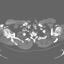

Class = AbdomenCT


In [41]:
image, label = trainset[1]   # this will call __getitem__(i = 0)
display(image)
print("Class =", trainset.classes[label])

In [45]:
import os
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import torchvision.transforms as transforms

class MedicalMnistDataset(Dataset):
    def __init__(self, root, transform=None):
        self.img_names = []
        self.targets = []
        self.root = root
        self.classes = ["AbdomenCT", "BreastMRI", "CXR", "ChestCT", "Hand", "HeadCT"]
        self.transform = transform

        for i, cls in enumerate(self.classes):
            class_folder = os.path.join(root, cls)
            samples = os.listdir(class_folder)
            samples = [os.path.join(cls, img_name) for img_name in samples]
            self.img_names.extend(samples)
            self.targets.extend([i] * len(samples))

    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, i):
        image_path = os.path.join(self.root, self.img_names[i])
        image = Image.open(image_path)
        if self.transform is not None:
            image = self.transform(image)
        label = self.targets[i]
        return image, label

# Create the dataset
trainset = MedicalMnistDataset('/content', transform=None)

# Define the split sizes
train_size = int(0.8 * len(trainset))
test_size = len(trainset) - train_size

# Split the dataset
train_dataset, test_dataset = random_split(trainset, [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)